<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width = 400, align = "center"></a>

# <center>Simple Linear Regression</center>


#### About this Notebook
In this notebook, we learn how to use scikit-learn to implement simple linear regression. We use a dataset related to health indicators, including age, glucose levels, and BMI. Then, we split our data into training and test sets, create a model using the training set, evaluate the model using the test set, and finally use the model to predict unknown values.


### Importing Needed packages

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Downloading Data
To download the data, we will use !wget to download it from IBM Object Storage.

In [ ]:
dataset_path = '"./healthcare-dataset-stroke-data.csv"'

__Did you know?__ When it comes to Machine Learning, you will likely be working with large datasets. As a business, where can you host your data? IBM is offering a unique opportunity for businesses, with 10 Tb of IBM Cloud Object Storage: [Sign up now for free](http://cocl.us/ML0101EN-IBM-Offer-CC)


## Understanding the Data

### `healthcare-dataset-stroke-data.csv:`:
Este dataset obtido através do website **`kaggle.com`** pretende analisar e prever o risco de derrame em pacientes com base nas suas características demográficas, clínicas e relacionadas com o respetivo estilo de vida. A nível geral, o dataset, contém informações sobre pacientes, incluindo dados médicos e comportamentais.[Dataset source](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

**Descrição das Variáveis:**
- **id:** Identificador único do paciente.
- **gender:** Sexo do paciente (Masculino, Feminino, Outro).
- **age:** Idade do paciente em anos.
- **hypertension:** Indica se o paciente tem hipertensão (0 = Não, 1 = Sim).
- **heart_disease:** Indica se o paciente tem doença cardíaca (0 = Não, 1 = Sim).
- **ever_married:** Indica se o paciente já foi casado (Sim ou Não).
- **work_type:** Tipo de ocupação do paciente (Privado, Autónomo, Criança, Governo, Nunca trabalhou).
- **Residence_type:** Tipo de residência do paciente (Rural ou Urbana).
- **avg_glucose_level:** Nível médio de glicose no sangue do paciente.
- **bmi:** Índice de Massa Corporal (IMC) do paciente.
- **smoking_status:** Status de tabagismo do paciente (Nunca fumou, Fumador, Foi Fumador, Desconhecido).
- **stroke:** Variável-alvo. Indica se o paciente sofreu um derrame (0 = Não, 1 = Sim).


## Reading the data in

In [18]:
df = pd.read_csv(dataset_path)

# take a look at the dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Data Exploration
Lets first have a descriptive exploration on our data.

In [21]:
# summarize the data
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Lets select some features to explore more.

In [23]:
cdf = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']]
cdf.head(9)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,61.0,0,0,202.21,NaN,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1
5,81.0,0,0,186.21,29.0,1
6,74.0,1,1,70.09,27.4,1
7,69.0,0,0,94.39,22.8,1
8,59.0,0,0,76.15,NaN,1


We can plot each of these features:

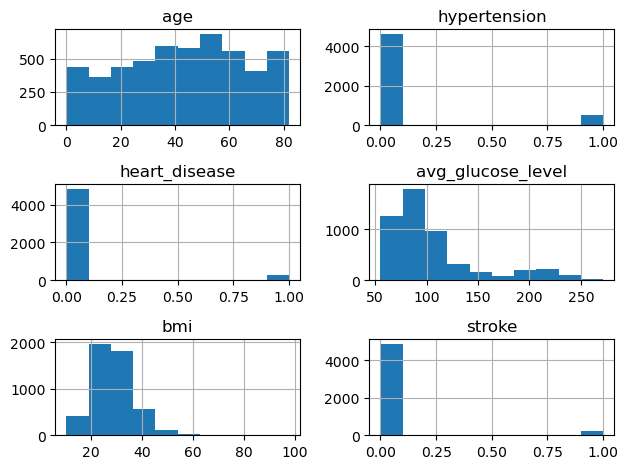

In [30]:
viz = cdf[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']]
viz.hist()
plt.tight_layout() # Evitar a sobreposição dos gráficos
plt.show()

Now, let's plot each of these features, age and glucose level vs BMI, to see how linear their relationships are.

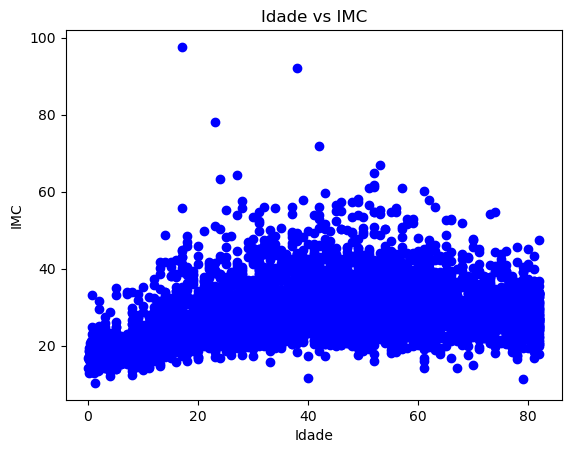

In [32]:
plt.scatter(cdf.age, cdf.bmi,  color='blue')
plt.xlabel("Idade")
plt.ylabel("IMC")
plt.title("Idade vs IMC")
plt.show()

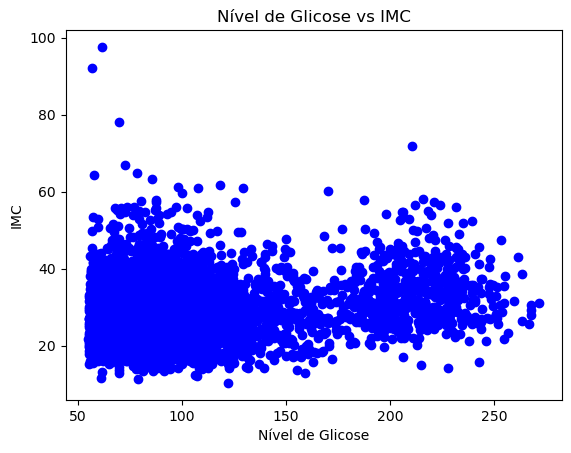

In [34]:
plt.scatter(cdf.avg_glucose_level, cdf.bmi,  color='blue')
plt.xlabel("Nível de Glicose")
plt.ylabel("IMC")
plt.title("Nível de Glicose vs IMC")
plt.show()

## Practice

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.



In [36]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Simple Regression Model
Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation. 

#### Train data distribution

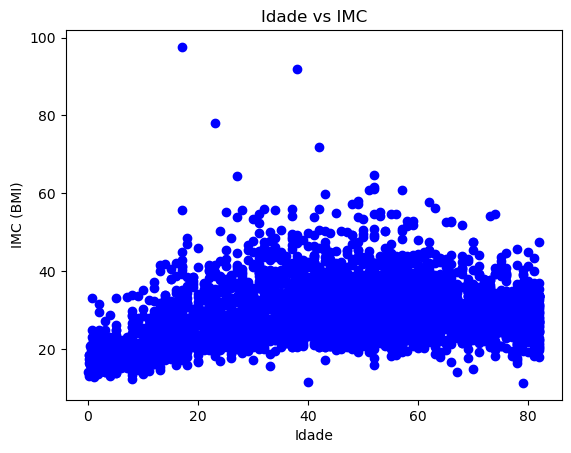

In [38]:
plt.scatter(train.age, train.bmi, color='blue')
plt.xlabel("Idade")
plt.ylabel("IMC (BMI)")
plt.title("Idade vs IMC")
plt.show()

#### Modeling
Using sklearn package to model data.

In [45]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train = train.dropna(subset=['bmi', 'age']) # Remover os valores ausentes
train_x = np.asanyarray(train[['age']])
train_y = np.asanyarray(train[['bmi']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [[0.11769029]]
Intercept:  [23.91592956]


As mentioned before, __Coefficient__ and __Intercept__ in the simple linear regression, are the parameters of the fit line. 
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. 
Notice that all of the data must be available to traverse and calculate the parameters.


#### Plot outputs

we can plot the fit line over the data:

Text(0.5, 1.0, 'Idade vs IMC com Linha de Regressão')

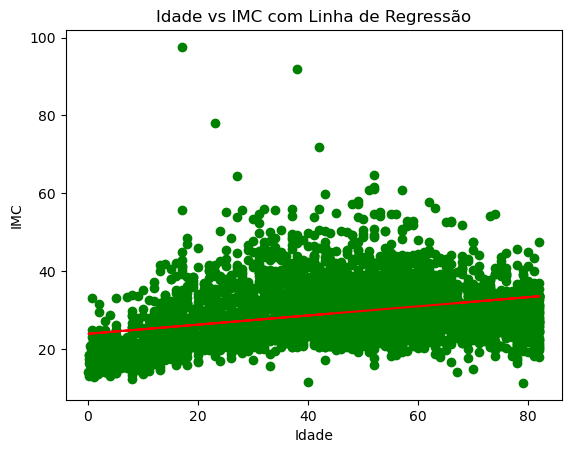

In [47]:
plt.scatter(train.age, train.bmi,  color='green')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Idade")
plt.ylabel("IMC")
plt.title("Idade vs IMC com Linha de Regressão")

#### Evaluation
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
    - Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
    - Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
    - Root Mean Squared Error (RMSE).
    - R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [53]:
from sklearn.metrics import r2_score

test = test.dropna(subset=['age', 'bmi'])
test_x = np.asanyarray(test[['age']])
test_y = np.asanyarray(test[['bmi']])
test_y_ = regr.predict(test_x)

print("Mean Absolute Error (MAE): %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual Sum of Squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean Absolute Error (MAE): 5.76
Residual Sum of Squares (MSE): 57.89
R2-score: -7.28


## Want to learn more?

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: [SPSS Modeler](http://cocl.us/ML0101EN-SPSSModeler).

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at [Watson Studio](https://cocl.us/ML0101EN_DSX)

### Thanks for completing this lesson!

Notebook created by: <a href = "https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>

<hr>
Copyright &copy; 2018 [Cognitive Class](https://cocl.us/DX0108EN_CC). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).​